# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [71]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
sns.set_context('poster')
sns.set_style("whitegrid")

In [181]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'

# load data
net_data = pd.read_csv(RAM_dir + 'group_analysis/network_stats.csv', index_col=0)
node_data = pd.read_csv(RAM_dir + 'group_analysis/node_stats.csv', index_col=0)

Check the data

In [182]:
net_data.head(10)

,band_measure,soz,n_tp,str_beta_bin,str_beta_num,fc_measure,band,subj,hand,age,gender,race
1,alpha_aec,0,480,-0.471856,0.181746,aec,alpha,R1284N,L,32,F,1.0
2,alpha_aec,1,480,-0.116341,0.142934,aec,alpha,R1284N,L,32,F,1.0
3,alpha_aec,2,480,-0.282289,0.125661,aec,alpha,R1284N,L,32,F,1.0
4,alpha_coh,0,480,-0.343034,0.197647,coh,alpha,R1284N,L,32,F,1.0
5,alpha_coh,1,480,-0.161108,0.053817,coh,alpha,R1284N,L,32,F,1.0
6,alpha_coh,2,480,-0.209249,0.100825,coh,alpha,R1284N,L,32,F,1.0
7,alpha_plv,0,480,0.013825,-0.046654,plv,alpha,R1284N,L,32,F,1.0
8,alpha_plv,1,480,-0.238573,0.162409,plv,alpha,R1284N,L,32,F,1.0
9,alpha_plv,2,480,-0.262649,0.218824,plv,alpha,R1284N,L,32,F,1.0
10,beta_aec,0,480,-0.792237,0.348519,aec,beta,R1284N,L,32,F,1.0


In [183]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 1 to 8096
Data columns (total 12 columns):
band_measure    8096 non-null object
soz             8096 non-null int64
n_tp            8096 non-null int64
str_beta_bin    7172 non-null float64
str_beta_num    7172 non-null float64
fc_measure      8096 non-null object
band            8096 non-null object
subj            8096 non-null object
hand            7904 non-null object
age             8096 non-null int64
gender          8096 non-null object
race            7728 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 822.2+ KB


In [184]:
net_data.describe()

,soz,n_tp,str_beta_bin,str_beta_num,age,race
count,8096.000000,8096.000000,7172.000000,7172.000000,8096.000000,7728.00000
mean,1.000000,1179.262846,-0.267825,0.115602,35.288538,2.99793
std,0.857478,1479.840245,1.995813,0.545320,11.799425,1.19790
min,0.000000,15.000000,-44.270761,-8.989738,0.000000,1.00000
25%,0.000000,180.000000,-0.580760,-0.057108,26.000000,2.00000
50%,1.000000,570.000000,-0.164934,0.059427,34.000000,4.00000
75%,2.000000,1478.000000,0.152860,0.256459,44.000000,4.00000
max,2.000000,7643.000000,37.055327,10.793787,64.000000,4.00000


In [185]:
node_data.head(10)

,elec,band_measure,n_tp,elec_spike,elec_in_soz,str_soz_beta_bin,str_not_soz_beta_bin,str_spike_beta_bin,str_not_spike_beta_bin,str_beta_bin,...,band,region,x,y,z,subj,hand,age,gender,race
1,G1,alpha_aec,480,0.025,0,-0.426582,-0.799592,-0.799630,NaN,-0.799630,...,alpha,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
2,G1,alpha_coh,480,0.025,0,-0.050027,-0.513385,-0.510302,NaN,-0.510302,...,alpha,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
3,G1,alpha_plv,480,0.025,0,-0.415751,-0.374872,-0.388218,NaN,-0.388218,...,alpha,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
4,G1,beta_aec,480,0.025,0,-0.414491,-0.721834,-0.720779,NaN,-0.720779,...,beta,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
5,G1,beta_coh,480,0.025,0,-0.147997,-0.707329,-0.709146,NaN,-0.709146,...,beta,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
6,G1,beta_plv,480,0.025,0,-0.310409,-0.663326,-0.683883,NaN,-0.683883,...,beta,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
7,G1,broadband_ar,480,0.025,0,-0.205465,0.105453,0.052865,0.020989,0.082416,...,broadband,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
8,G1,broadband_xcorr,480,0.025,0,-0.460946,0.235204,0.196587,0.172795,0.225470,...,broadband,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
9,G1,gamma_aec,480,0.025,0,-0.258839,-0.451699,-0.444553,NaN,-0.444553,...,gamma,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0
10,G1,gamma_coh,480,0.025,0,-0.202926,-0.363567,-0.367513,NaN,-0.367513,...,gamma,inferiortemporal,-46.1038,19.0348,-44.942917,R1284N,L,32,F,1.0


In [186]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209280 entries, 1 to 209280
Data columns (total 26 columns):
elec                      209280 non-null object
band_measure              209280 non-null object
n_tp                      209280 non-null int64
elec_spike                209280 non-null float64
elec_in_soz               209280 non-null int64
str_soz_beta_bin          207728 non-null float64
str_not_soz_beta_bin      192284 non-null float64
str_spike_beta_bin        208608 non-null float64
str_not_spike_beta_bin    171530 non-null float64
str_beta_bin              208608 non-null float64
str_soz_beta_num          207728 non-null float64
str_not_soz_beta_num      192284 non-null float64
str_spike_beta_num        208608 non-null float64
str_beta_num              208608 non-null float64
str_not_spike_beta_num    171530 non-null float64
fc_measure                209280 non-null object
band                      209280 non-null object
region                    192448 non-null objec

In [187]:
node_data.describe()

,n_tp,elec_spike,elec_in_soz,str_soz_beta_bin,str_not_soz_beta_bin,str_spike_beta_bin,str_not_spike_beta_bin,str_beta_bin,str_soz_beta_num,str_not_soz_beta_num,str_spike_beta_num,str_beta_num,str_not_spike_beta_num,x,y,z,age,race
count,209280.000000,209280.000000,209280.000000,207728.000000,192284.000000,208608.000000,171530.000000,208608.000000,207728.000000,192284.000000,208608.000000,208608.000000,171530.000000,209280.000000,209280.000000,209280.000000,209280.000000,205696.000000
mean,1250.793043,0.022182,0.082722,-0.098517,-0.143860,-0.118513,-0.131282,-0.139878,0.061094,0.084338,0.071711,0.082815,0.078701,-9.986493,-7.086941,3.972051,35.468272,3.104465
std,1493.222872,0.048247,0.275462,1.273835,1.271968,1.262530,1.262224,1.272373,0.386960,0.399568,0.387568,0.394239,0.393890,45.180104,36.782977,29.784361,11.570041,1.182440
min,12.000000,0.000000,0.000000,-21.337347,-26.332021,-31.979384,-25.591782,-30.189620,-9.909859,-7.849945,-7.876960,-7.560005,-7.957696,-165.993000,-143.909000,-92.132038,16.000000,1.000000
25%,192.000000,0.000000,0.000000,-0.390382,-0.445946,-0.426007,-0.439396,-0.456561,-0.056516,-0.048430,-0.052539,-0.049818,-0.051464,-46.840350,-30.872200,-20.327010,26.000000,2.000000
50%,629.000000,0.003472,0.000000,-0.072799,-0.099664,-0.084833,-0.094994,-0.099507,0.034914,0.046583,0.040301,0.047031,0.043802,-21.114850,-8.424795,-1.010540,34.000000,4.000000
75%,1741.000000,0.018960,0.000000,0.187079,0.157459,0.175400,0.172557,0.166235,0.168926,0.201123,0.186545,0.202760,0.194758,31.678925,15.777700,27.732678,44.000000,4.000000
max,7643.000000,0.600000,1.000000,30.553535,27.666095,28.979234,28.388302,31.939647,7.541961,8.655818,8.984809,8.501371,9.077148,79.139500,207.770000,91.013510,64.000000,4.000000


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


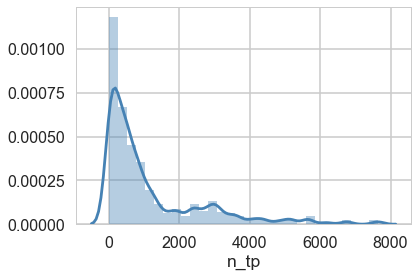

In [188]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [189]:
net_data.subj.nunique()

173

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


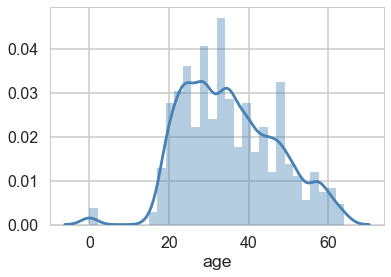

In [190]:
sns.distplot(net_data['age'], bins=30, color='steelblue')
mean_age = net_data['age'].mean()

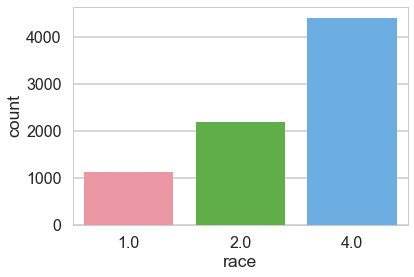

In [191]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

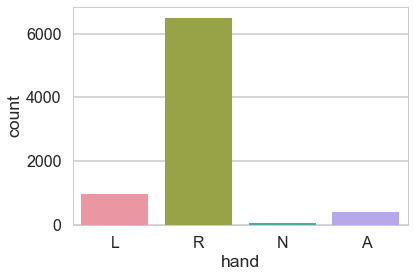

In [192]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

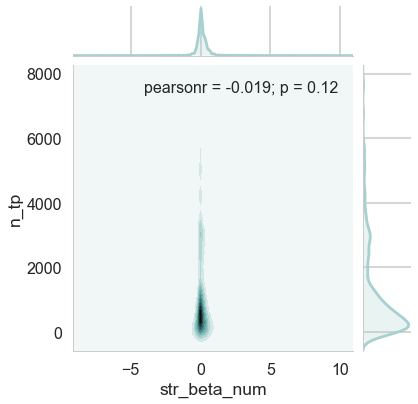

In [193]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

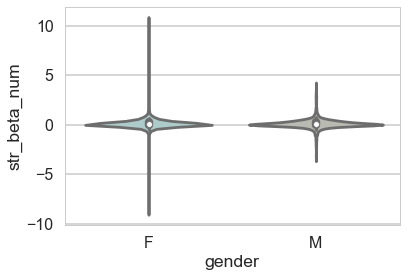

In [194]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [195]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [196]:
net_data.dropna(inplace=True)
net_data['soz'] = net_data['soz'].astype('category')
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7172 entries, 1 to 8096
Data columns (total 12 columns):
band_measure    7172 non-null object
soz             7172 non-null category
n_tp            7172 non-null int64
str_beta_bin    7172 non-null float64
str_beta_num    7172 non-null float64
fc_measure      7172 non-null object
band            7172 non-null object
subj            7172 non-null object
hand            7172 non-null object
age             7172 non-null float64
gender          7172 non-null object
race            7172 non-null float64
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 679.5+ KB


In [197]:
net_data.dropna(inplace=True)
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209280 entries, 1 to 209280
Data columns (total 26 columns):
elec                      209280 non-null object
band_measure              209280 non-null object
n_tp                      209280 non-null int64
elec_spike                209280 non-null float64
elec_in_soz               209280 non-null int64
str_soz_beta_bin          207728 non-null float64
str_not_soz_beta_bin      192284 non-null float64
str_spike_beta_bin        208608 non-null float64
str_not_spike_beta_bin    171530 non-null float64
str_beta_bin              208608 non-null float64
str_soz_beta_num          207728 non-null float64
str_not_soz_beta_num      192284 non-null float64
str_spike_beta_num        208608 non-null float64
str_beta_num              208608 non-null float64
str_not_spike_beta_num    171530 non-null float64
fc_measure                209280 non-null object
band                      209280 non-null object
region                    192448 non-null objec

In [198]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150392 entries, 7 to 209272
Data columns (total 26 columns):
elec                      150392 non-null object
band_measure              150392 non-null object
n_tp                      150392 non-null int64
elec_spike                150392 non-null float64
elec_in_soz               150392 non-null int64
str_soz_beta_bin          150392 non-null float64
str_not_soz_beta_bin      150392 non-null float64
str_spike_beta_bin        150392 non-null float64
str_not_spike_beta_bin    150392 non-null float64
str_beta_bin              150392 non-null float64
str_soz_beta_num          150392 non-null float64
str_not_soz_beta_num      150392 non-null float64
str_spike_beta_num        150392 non-null float64
str_beta_num              150392 non-null float64
str_not_spike_beta_num    150392 non-null float64
fc_measure                150392 non-null object
band                      150392 non-null object
region                    150392 non-null objec

In [199]:
# save
net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength within, or outside of the seizure onset zone (SOZ)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


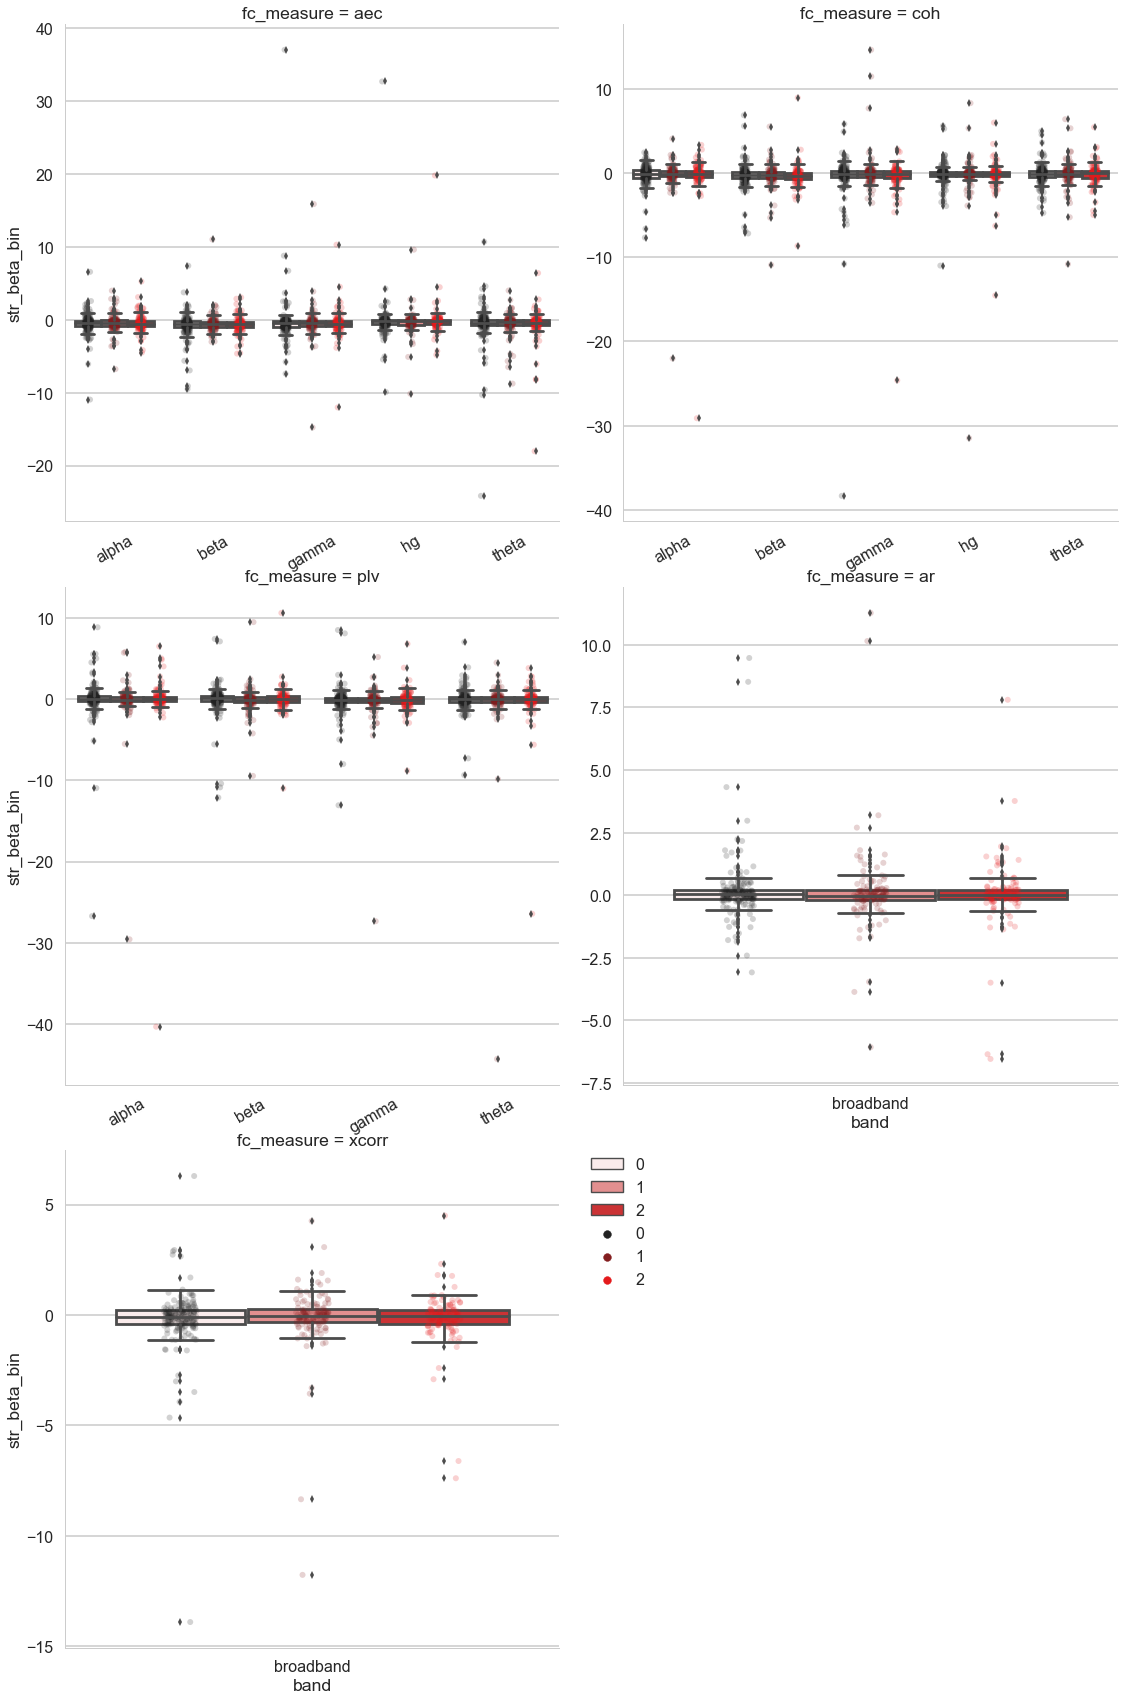

In [94]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=net_data, col='fc_measure' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'soz', hue_order = [0, 1, 2])
g.map(sns.stripplot, 'band', 'str_beta_bin', 'soz',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


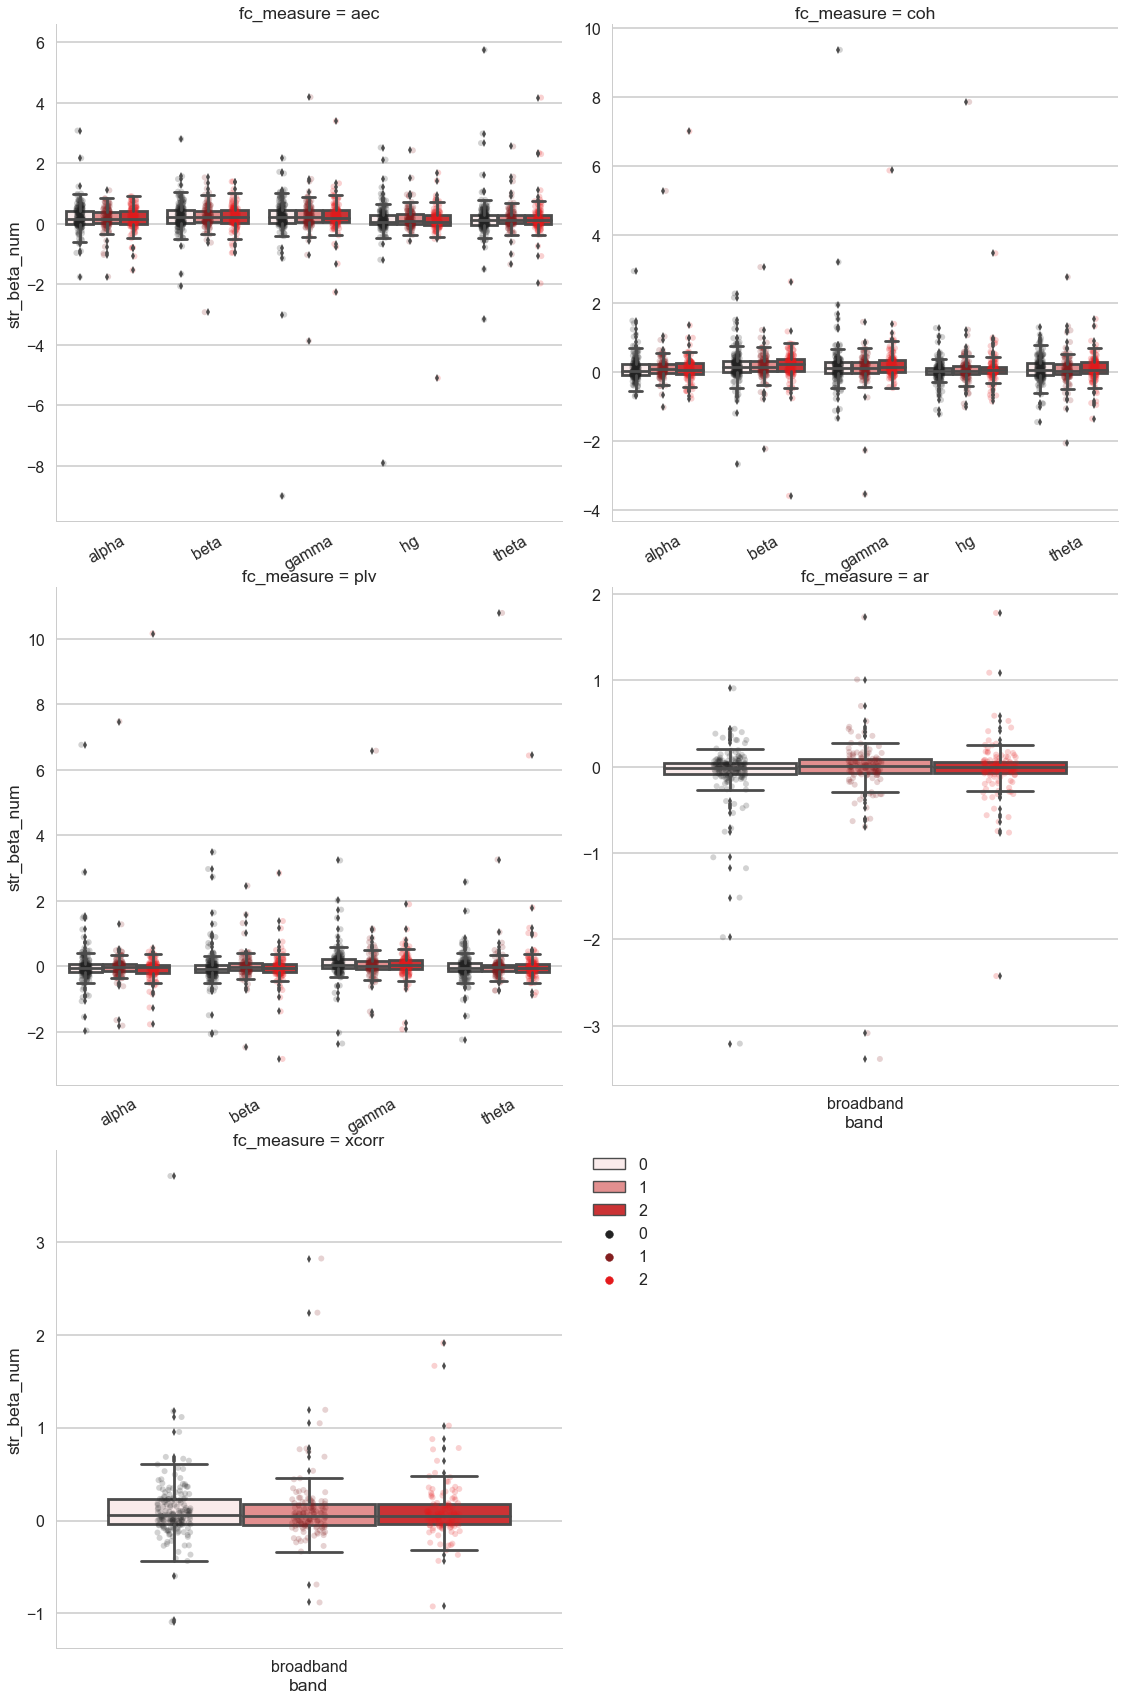

In [95]:
# grand teton palette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette(sns.color_palette('Set1'))

g = sns.FacetGrid(data=net_data, col='fc_measure' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'soz')
g.map(sns.stripplot, 'band', 'str_beta_num', 'soz',jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_num.eps")

## Effects on Node Measures

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


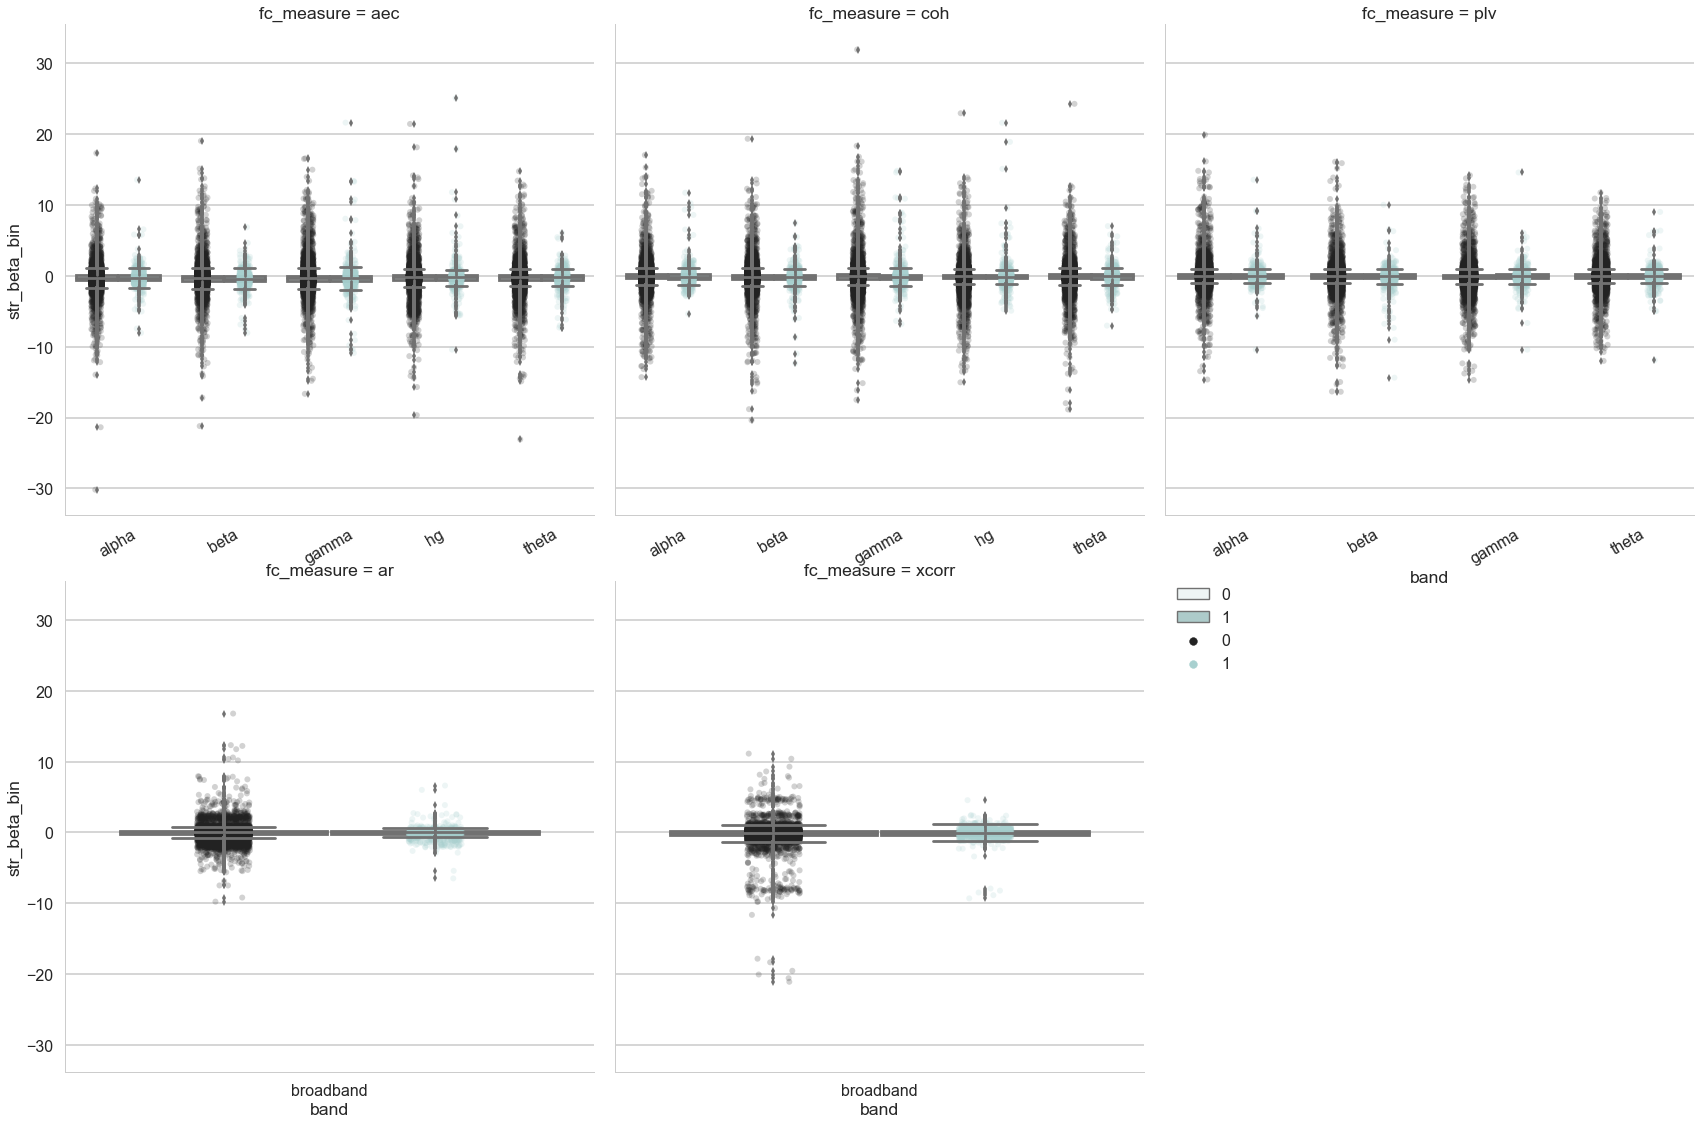

In [99]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


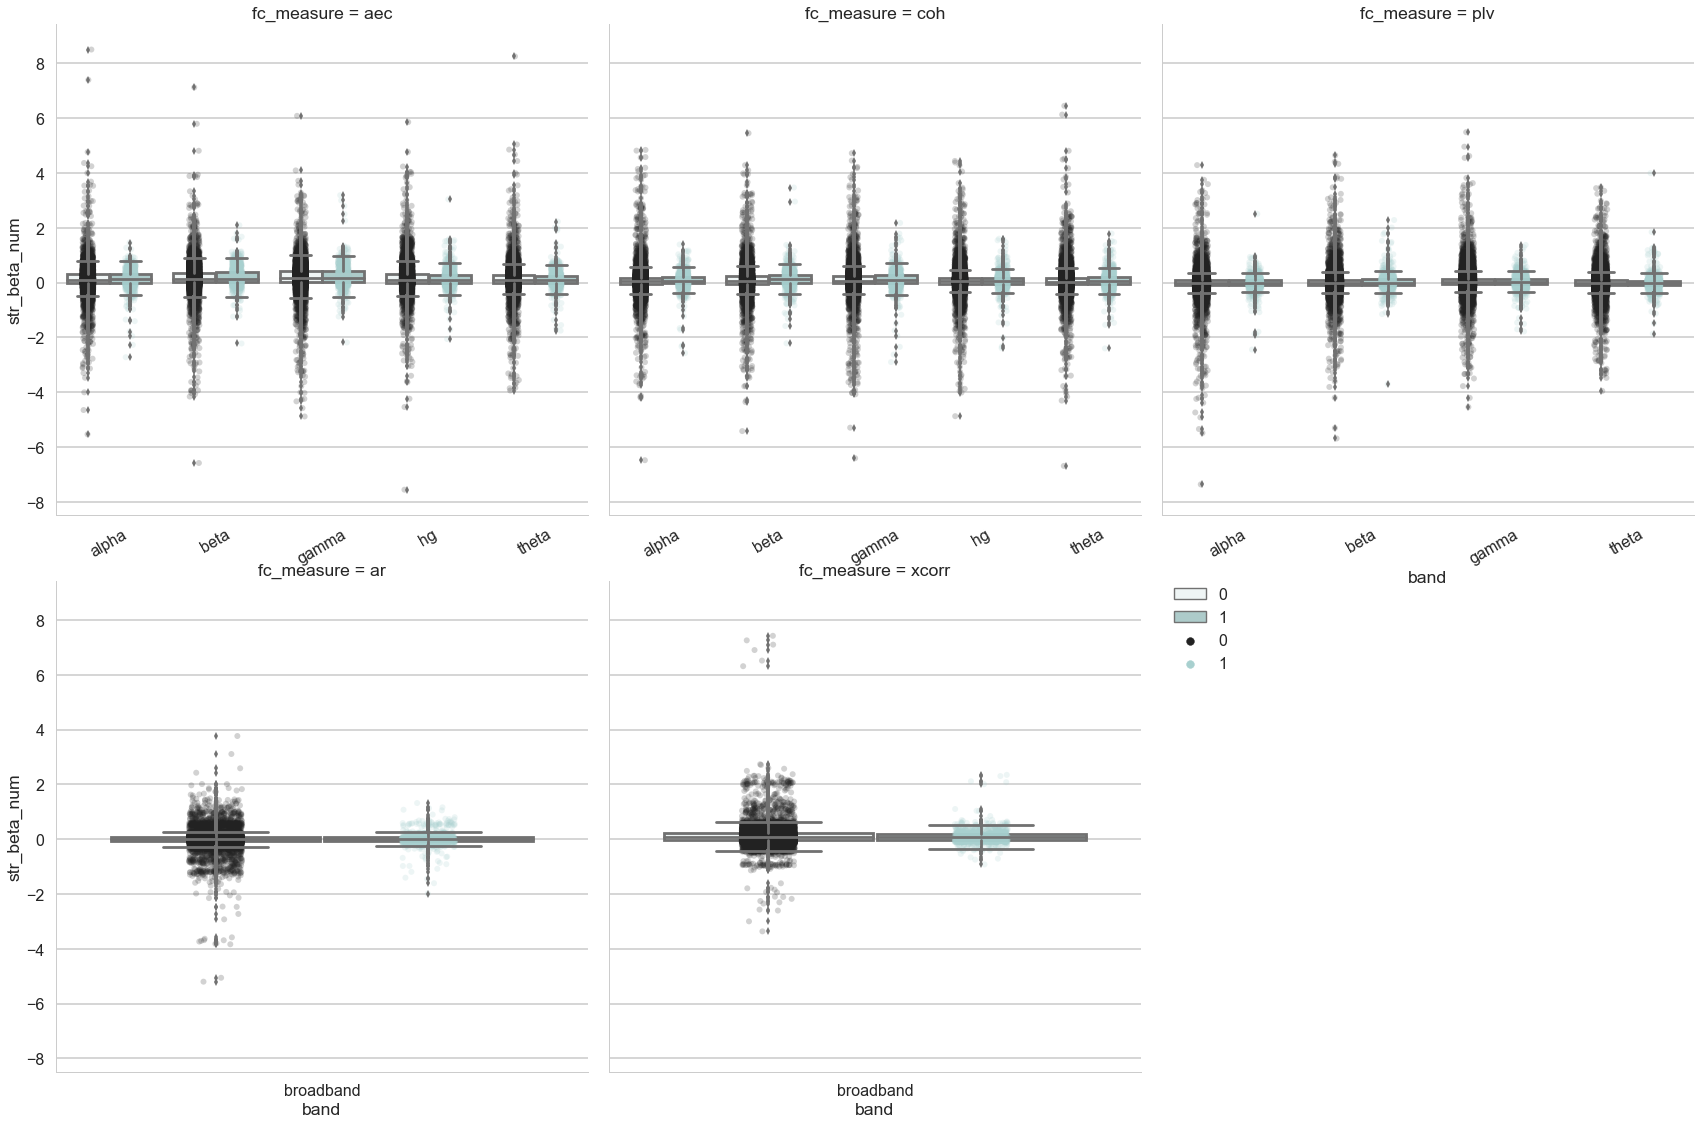

In [100]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

### Categorize SOZ

In [200]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [205]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,subj,locus
0,R1284N,amb
1,R1276D,tle
2,R1260D,amb
3,R1250N,amb
4,R1247P,tle


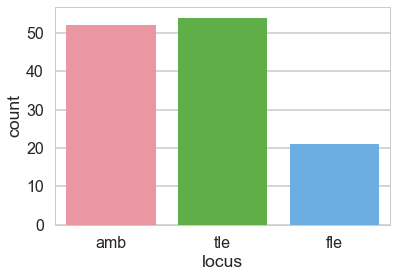

In [206]:
sns.countplot(data=epilepsy_type, x='locus')

In [210]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6356 entries, 0 to 6355
Data columns (total 15 columns):
band_measure    6356 non-null object
soz             6356 non-null category
n_tp            6356 non-null int64
str_beta_bin    6356 non-null float64
str_beta_num    6356 non-null float64
fc_measure      6356 non-null object
band            6356 non-null object
subj            6356 non-null object
hand            6356 non-null object
age             6356 non-null float64
gender          6356 non-null object
race            6356 non-null float64
locus_x         6356 non-null object
locus_y         6356 non-null object
locus           6356 non-null object
dtypes: category(1), float64(4), int64(1), object(9)
memory usage: 751.2+ KB


In [211]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209280 entries, 0 to 209279
Data columns (total 27 columns):
elec                      209280 non-null object
band_measure              209280 non-null object
n_tp                      209280 non-null int64
elec_spike                209280 non-null float64
elec_in_soz               209280 non-null int64
str_soz_beta_bin          207728 non-null float64
str_not_soz_beta_bin      192284 non-null float64
str_spike_beta_bin        208608 non-null float64
str_not_spike_beta_bin    171530 non-null float64
str_beta_bin              208608 non-null float64
str_soz_beta_num          207728 non-null float64
str_not_soz_beta_num      192284 non-null float64
str_spike_beta_num        208608 non-null float64
str_beta_num              208608 non-null float64
str_not_spike_beta_num    171530 non-null float64
fc_measure                209280 non-null object
band                      209280 non-null object
region                    192448 non-null objec

## Net plots with category by locus

In [212]:
#get only total strength
net_str = net_data[net_data['soz'] == 2]

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


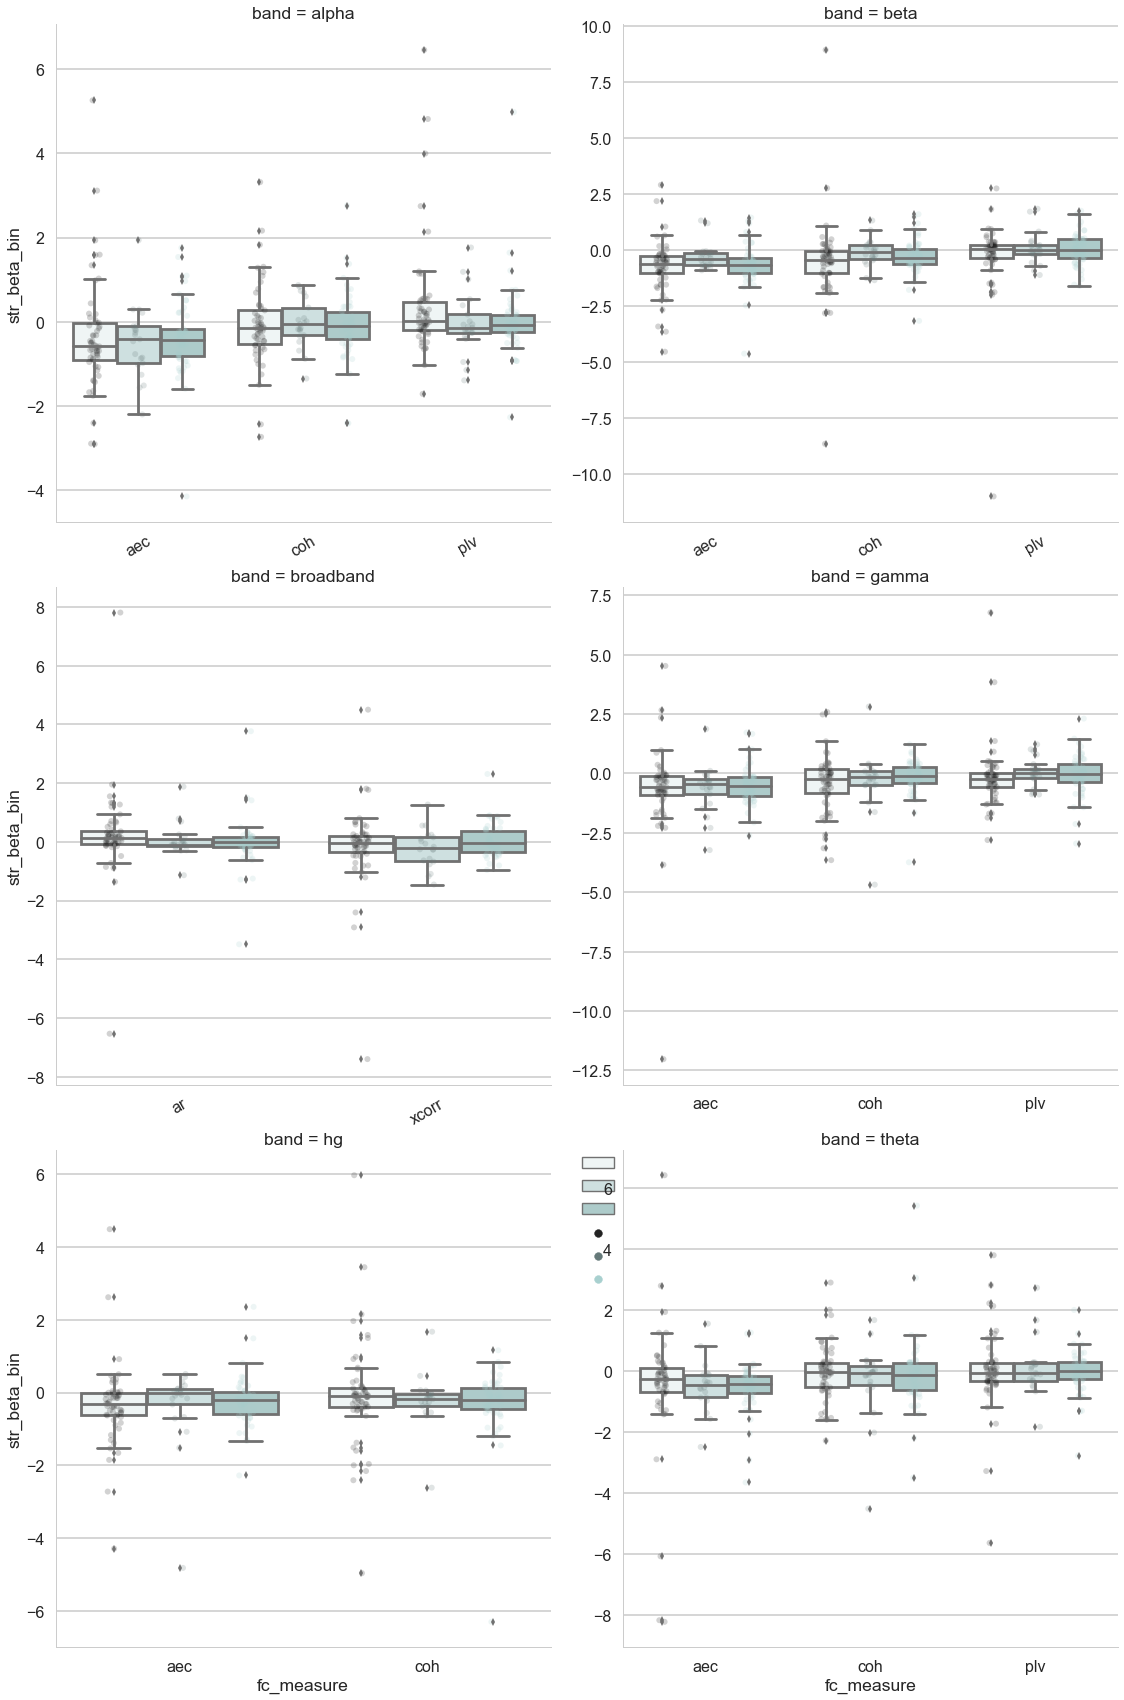

In [222]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_str, col='band' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'])
g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


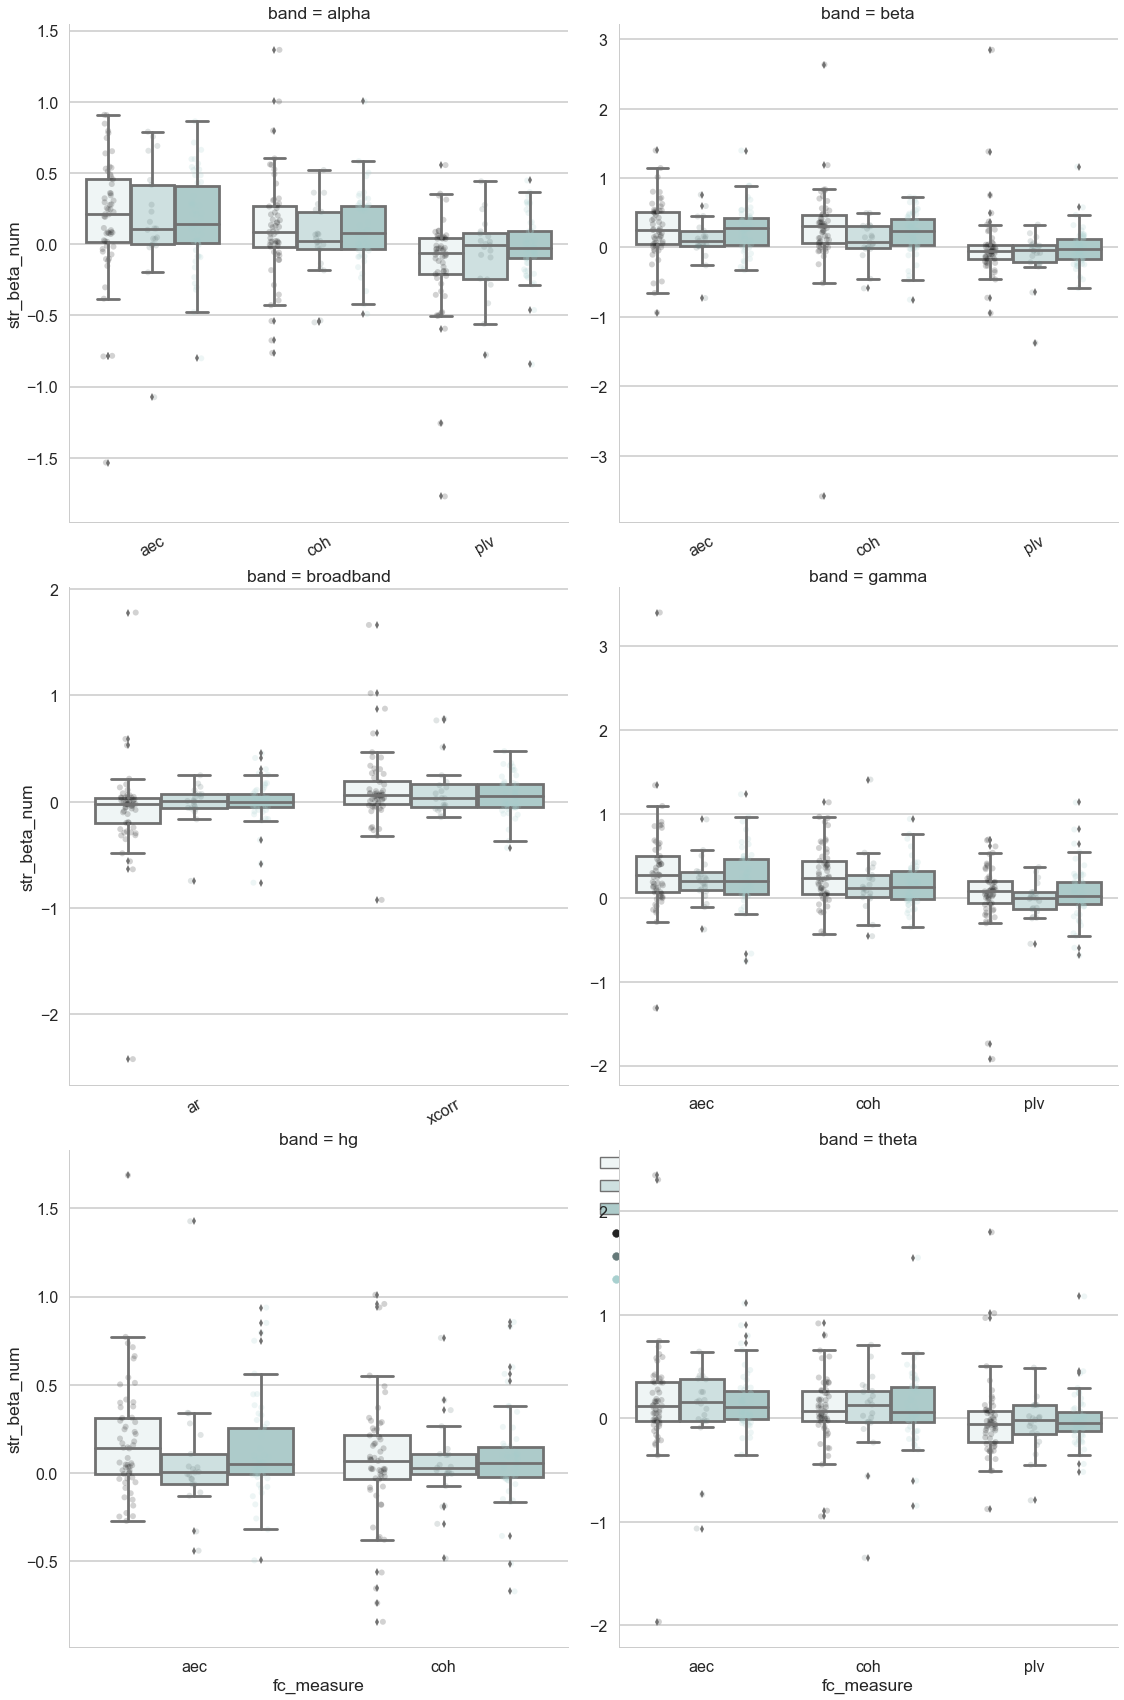

In [221]:
g = sns.FacetGrid(data=net_str, col='band' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'fc_measure', 'str_beta_num', 'locus', hue_order = ['tle','fle','amb'])
g.map(sns.stripplot, 'fc_measure', 'str_beta_num', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")